In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataset import SynergyDataset

In [75]:
input_train = pd.read_csv('data/train_data/df_train.csv', index_col=0)
input_valid = pd.read_csv('data/train_data/df_valid.csv', index_col=0)
input_test = pd.read_csv('data/train_data/df_test.csv', index_col=0)

In [76]:
dataset = SynergyDataset(input_train, input_valid, input_test)

In [77]:
dataset.load(n_components=5)

Molecule embeddings creation
Gene data extraction
Gene PCA features creation
Cell body zone information encoding


In [78]:
dataset.splits['train']

,Drug1,Drug2,pca_features,body_zone
1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, ...","[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, ...","[-1.4964682740422686, -10.557965007301128, 19....","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
2,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, ...","[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, ...","[-6.733239065532051, -9.284287562730958, 15.67...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
3,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, ...","[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, ...","[-16.22521257601391, -5.503403737625909, -2.64...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
4,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, ...","[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, ...","[-4.68456756827003, -5.780269032159722, -8.823...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
5,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, ...","[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, ...","[-15.001214982555412, -11.826499062274745, 4.3...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
...,...,...,...,...
16129,"[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-12.173132342178276, -4.285303952342713, -3.3...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
16130,"[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[38.26089220389967, -17.664596301014537, -2.68...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
16131,"[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[18.87214270124239, 3.3726846744828713, -22.96...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
16132,"[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-11.219812183244368, 12.689929041547979, -2.4...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [79]:
smi1, smi2, cell_id, features, y = dataset.get_item(0, 'valid')

In [80]:
from catboost import CatBoostRegressor

In [81]:
reg = CatBoostRegressor(verbose=False)

In [82]:
X_dict = {'train': [], 'valid': [], 'test': []}
y_dict = {'train': [], 'valid': [], 'test': []}

for split_type in ['train', 'valid', 'test']:
    
    size = dataset.splits[split_type].shape[0]
    
    for i in range(size):
        
        smi1, smi2, cell_id, features, y = dataset.get_item(i, split_type)
        print(f'{smi1} and {smi2} on {cell_id} have synergy {y}\n')
        
        X = []
        
        X.extend(features['Drug1'])
        X.extend(features['Drug2'])
        X.extend(features['pca_features'])
        X.extend(features['body_zone'])
        
        X_dict[split_type].append(X)
        y_dict[split_type].append(y)
    
    
    X_dict[split_type] = np.array(X_dict[split_type])    
    y_dict[split_type] = np.array(y_dict[split_type])    
        
        
    
    
    

O=c1[nH]cc(F)c(=O)[nH]1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on A2780 have synergy 7.778053060099999

O=c1[nH]cc(F)c(=O)[nH]1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on A-375 have synergy -1.1985054379

O=c1[nH]cc(F)c(=O)[nH]1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on Caov-3 have synergy -5.1399712212

O=c1[nH]cc(F)c(=O)[nH]1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on DLD-1 have synergy 1.9351271188

O=c1[nH]cc(F)c(=O)[nH]1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on ES-2 have synergy 1.4986504517

O=c1[nH]cc(F)c(=O)[nH]1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on HCT 116 have synergy 9.4632808694

O=c1[nH]cc(F)c(=O)[nH]1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on HT-144 have synergy -3.7013547459

O=c1[nH]cc(F)c(=O)[nH]1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on HT-29 have synergy 10.1734339084

O=c1[nH]cc(F)c(=O)[nH]1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on KPL-1 have synergy 2.1570044282

O=c1[nH]cc(F)c(=O)[nH]1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on LNCAP have synergy 1.6326315853

CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on NCI-H2122 have synergy 0.0764558249

CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on OV-90 have synergy -27.749135907

CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on NIH:OVCAR-3 have synergy -3.2084361721

CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on PA-1 have synergy -24.694612158

CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on RPMI-7951 have synergy -26.722585116

CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on SK-MEL-30 have synergy 2.0839281646

CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on SW 620 have synergy 2.6793459223

CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on SW 837 have synergy -9.0448007001

CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on T-47D have synergy -34.6779441093

CC1(c2nc3c(C(N)=O)cc

CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on NCI-H2122 have synergy -25.366993260900003

CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on NCI-H460 have synergy -24.291652934

CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on NCI-H520 have synergy -42.0475436533

CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on OV-90 have synergy -28.6673645478

CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on PA-1 have synergy -17.4805574895

CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on SK-MEL-30 have synergy -11.611821109

CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on SK-MES-1 have synergy -33.4243702723

CC(C)CC(

O=P1(N(CCCl)CCCl)NCCCO1 and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on Caov-3 have synergy -4.0870854192

O=P1(N(CCCl)CCCl)NCCCO1 and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on DLD-1 have synergy 2.3381182001

O=P1(N(CCCl)CCCl)NCCCO1 and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on EFM-192B have synergy 2.2820477112

O=P1(N(CCCl)CCCl)NCCCO1 and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on ES-2 have synergy -4.6644878297000005

O=P1(N(CCCl)CCCl)NCCCO1 and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on HT-144 have synergy -13.5716823426

O=P1(N(CCCl)CCCl)NCCCO1 and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on HT-29 have synergy 2.1698000726

O=P1(N(CCCl)CCCl)NCCCO1 and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on KPL-1 have synergy -6.373246301699999

O=P1(N(CCCl)CCCl)NCCCO1 and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on LNCAP have synergy -29.8958427284

O=P1(N(CCCl)CCCl)NCCCO1 and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on LoVo have synergy -3.0722807444

O=P1(N(CCCl)CCC

CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO and N#Cc1ccc(Cn2cncc2CN2CCN(c3cccc(Cl)c3)C(=O)C2)cc1 on A-427 have synergy 9.7565112713

CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO and N#Cc1ccc(Cn2cncc2CN2CCN(c3cccc(Cl)c3)C(=O)C2)cc1 on Caov-3 have synergy 31.4801692902

CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO and N#Cc1ccc(Cn2cncc2CN2CCN(c3cccc(Cl)c3)C(=O)C2)cc1 on DLD-1 have synergy 2.8259530604000003

CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO and N#Cc1ccc(Cn2cncc2CN2CCN(c3cccc(Cl)c3)C(=O)C2)cc1 on EFM-192B have synergy -15.008844063900002

CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO and N#Cc1ccc(Cn2cncc2CN2CCN(c3cccc(Cl)c3)C(=O)C2)cc1 on HCT 116 have synergy -2.1283200978

CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO and N#Cc1ccc(Cn2cncc2CN2CCN(c3cccc(Cl)c3)C(=O)C2)cc1 on KPL-1 have synergy 16.4381417585

CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO and N#Cc1ccc(Cn2cncc2CN2CCN(c3cccc(Cl)c3)C(=O)C2)cc1 on MDA

C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on A-427 have synergy -3.7595995483

C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on DLD-1 have synergy 31.6796519915

C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on ES-2 have synergy -3.0598346432

C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on HT-29 have synergy 6.1133274467

C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on KPL-1 have synergy 8.3930886513

C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on LNCAP have synergy 18.1382982951

C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 

Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1 and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on LNCAP have synergy -5.8822514499

Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1 and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on LoVo have synergy -8.387551732999999

Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1 and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on MDA-MB-436 have synergy -3.2483947143000003

Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1 and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on NCI-H1650 have synergy -19.963030768

Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1 and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on NCI-H2122 have synergy -3.4004115771

Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1 and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on NCI-H460 have synergy -5.733262074

Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1 and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on NCI-H520 have synergy -8.7664749751

Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1 and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on OV-90 

CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on A-427 have synergy -26.0032378846

CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on Caov-3 have synergy 11.5202043821

CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on ES-2 have synergy -7.9438069873

CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on HCT 116 have synergy -1.0958669844

CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on HT-144 have synergy -0.4604287769

CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on HT-29 have synergy 7.8808879086

CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on KPL-1 have syner

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on LoVo have synergy 1.4562613703999998

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on MDA-MB-436 have synergy 5.0556312326

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on NCI-H1650 have synergy 7.312360595599999

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on NCI-H2122 have synergy 5.5460675749

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on NCI-H520 have synergy 2.9922979921

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on OV-90 have synergy 3.060698

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on NIH:OVCAR-3 have synergy 15.6252635591

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on PA-1 have synergy 4.5734994915

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on RKO have synergy 8.3974715635

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on RPMI-7951 have synergy 5.136172152099999

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on SK-MEL-30 have synergy 2.4228088583000003

CN(C)C(=N

COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12 and CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)cc32)c1C on OV-90 have synergy -0.8691686544

COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12 and CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)cc32)c1C on NIH:OVCAR-3 have synergy -0.2544648331

COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12 and CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)cc32)c1C on PA-1 have synergy -5.3243271157

COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12 and CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)cc32)c1C on RKO have synergy -5.900085665700001

COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12 and CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)cc32)c1C on RPMI-7951 have synergy -5.641746875599999

COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12 and CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)cc32)c1C on SK-MEL-30 have synergy 4.8440820155

COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12 and CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)cc32)c1C on

CN1C(=O)C=CC2(C)C3CCC4(C)C(NC(=O)OCC(F)(F)F)CCC4C3CCC12 and COC1CC2CCC(C)C(O)(O2)C(=O)C(=O)N2CCCCC2C(=O)OC(C(C)CC2CCC(OP(C)(C)=O)C(OC)C2)CC(=O)C(C)C=C(C)C(O)C(OC)C(=O)C(C)CC(C)C=CC=CC=C1C on NCI-H2122 have synergy 0.6866950041

CN1C(=O)C=CC2(C)C3CCC4(C)C(NC(=O)OCC(F)(F)F)CCC4C3CCC12 and COC1CC2CCC(C)C(O)(O2)C(=O)C(=O)N2CCCCC2C(=O)OC(C(C)CC2CCC(OP(C)(C)=O)C(OC)C2)CC(=O)C(C)C=C(C)C(O)C(OC)C(=O)C(C)CC(C)C=CC=CC=C1C on NCI-H460 have synergy -5.051717382300001

CN1C(=O)C=CC2(C)C3CCC4(C)C(NC(=O)OCC(F)(F)F)CCC4C3CCC12 and COC1CC2CCC(C)C(O)(O2)C(=O)C(=O)N2CCCCC2C(=O)OC(C(C)CC2CCC(OP(C)(C)=O)C(OC)C2)CC(=O)C(C)C=C(C)C(O)C(OC)C(=O)C(C)CC(C)C=CC=CC=C1C on NCI-H520 have synergy -0.2008298996

CN1C(=O)C=CC2(C)C3CCC4(C)C(NC(=O)OCC(F)(F)F)CCC4C3CCC12 and COC1CC2CCC(C)C(O)(O2)C(=O)C(=O)N2CCCCC2C(=O)OC(C(C)CC2CCC(OP(C)(C)=O)C(OC)C2)CC(=O)C(C)C=C(C)C(O)C(OC)C(=O)C(C)CC(C)C=CC=CC=C1C on OV-90 have synergy 1.9073618216

CN1C(=O)C=CC2(C)C3CCC4(C)C(NC(=O)OCC(F)(F)F)CCC4C3CCC12 and COC1CC2CCC(C)C(O)(O2)C(=O)C

O=C(O)C1(Cc2cccc(Nc3nccs3)n2)CCC(Oc2cccc(Cl)c2F)CC1 and Cn1cc(-c2cnn3c(N)c(Br)c(C4CCCNC4)nc23)cn1 on HT-144 have synergy -6.3600947377

O=C(O)C1(Cc2cccc(Nc3nccs3)n2)CCC(Oc2cccc(Cl)c2F)CC1 and Cn1cc(-c2cnn3c(N)c(Br)c(C4CCCNC4)nc23)cn1 on HT-29 have synergy 0.2650912754

O=C(O)C1(Cc2cccc(Nc3nccs3)n2)CCC(Oc2cccc(Cl)c2F)CC1 and Cn1cc(-c2cnn3c(N)c(Br)c(C4CCCNC4)nc23)cn1 on KPL-1 have synergy -5.4553263564

O=C(O)C1(Cc2cccc(Nc3nccs3)n2)CCC(Oc2cccc(Cl)c2F)CC1 and Cn1cc(-c2cnn3c(N)c(Br)c(C4CCCNC4)nc23)cn1 on MDA-MB-436 have synergy 5.711047137

O=C(O)C1(Cc2cccc(Nc3nccs3)n2)CCC(Oc2cccc(Cl)c2F)CC1 and Cn1cc(-c2cnn3c(N)c(Br)c(C4CCCNC4)nc23)cn1 on NCI-H1650 have synergy -3.7483841302

O=C(O)C1(Cc2cccc(Nc3nccs3)n2)CCC(Oc2cccc(Cl)c2F)CC1 and Cn1cc(-c2cnn3c(N)c(Br)c(C4CCCNC4)nc23)cn1 on NCI-H460 have synergy -10.5544510527

O=C(O)C1(Cc2cccc(Nc3nccs3)n2)CCC(Oc2cccc(Cl)c2F)CC1 and Cn1cc(-c2cnn3c(N)c(Br)c(C4CCCNC4)nc23)cn1 on NCI-H520 have synergy -12.5856952658

O=C(O)C1(Cc2cccc(Nc3nccs3)n2)CCC(Oc2cccc

O=S1(=O)NC2(CN1CC(F)(F)F)C1CCC2Cc2cc(C=CCN3CCC(C(F)(F)F)CC3)ccc2C1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on LoVo have synergy -24.238583891100003

O=S1(=O)NC2(CN1CC(F)(F)F)C1CCC2Cc2cc(C=CCN3CCC(C(F)(F)F)CC3)ccc2C1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on NCI-H1650 have synergy -14.8596766233

O=S1(=O)NC2(CN1CC(F)(F)F)C1CCC2Cc2cc(C=CCN3CCC(C(F)(F)F)CC3)ccc2C1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on NCI-H460 have synergy -49.673939134

O=S1(=O)NC2(CN1CC(F)(F)F)C1CCC2Cc2cc(C=CCN3CCC(C(F)(F)F)CC3)ccc2C1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on NCI-H520 have synergy -11.5357280194

O=S1(=O)NC2(CN1CC(F)(F)F)C1CCC2Cc2cc(C=CCN3CCC(C(F)(F)F)CC3)ccc2C1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on OV-90 have synergy -22.822558608

O=S1(=O)NC2(CN1CC(F)(F)F)C1CCC2Cc2cc(C=CCN3CCC(C(F)(F)F)CC3)ccc2C1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on RKO have synergy -22.9243205289

O=S1(=O)NC2(CN1CC(F)(F)F)C1CCC2Cc2cc(C=CCN3CCC(C(F)(F)F)CC3)ccc2C1 and NC1CCCCC1N.O=C(O)C(=O)O.[Pt+2] on RPMI-7951 have synergy -24.6140842324

O=S1(=

O=C(NOCC(O)CO)c1ccc(F)c(F)c1Nc1ccc(I)cc1F and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on ES-2 have synergy 7.007030952999999

O=C(NOCC(O)CO)c1ccc(F)c(F)c1Nc1ccc(I)cc1F and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on HT-144 have synergy 12.1151470357

O=C(NOCC(O)CO)c1ccc(F)c(F)c1Nc1ccc(I)cc1F and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on LNCAP have synergy 44.2299631382

O=C(NOCC(O)CO)c1ccc(F)c(F)c1Nc1ccc(I)cc1F and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on LoVo have synergy -14.4753840812

O=C(NOCC(O)CO)c1ccc(F)c(F)c1Nc1ccc(I)cc1F and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on NCI-H520 have synergy -17.9889816654

O=C(NOCC(O)CO)c1ccc(F)c(F)c1Nc1ccc(I)cc1F and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on NIH:OVCAR-3 have synergy 1.9243949115

O=C(NOCC(O)CO)c1ccc(F)c(F)c1Nc1cc

Cn1nnc2c(C(N)=O)ncn2c1=O and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on LoVo have synergy -9.5793026953

Cn1nnc2c(C(N)=O)ncn2c1=O and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on MDA-MB-436 have synergy -3.4836386754000004

Cn1nnc2c(C(N)=O)ncn2c1=O and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on NCI-H1650 have synergy -31.2325134633

Cn1nnc2c(C(N)=O)ncn2c1=O and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on NCI-H460 have synergy 13.9249264573

Cn1nnc2c(C(N)=O)ncn2c1=O and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on NCI-H520 have synergy 19.517346555

Cn1nnc2c(C(N)=O)ncn2c1=O and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on OV-90 have synergy -0.2488094723

Cn1nnc2c(C(N)=O)ncn2c1=O and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on RPMI-7951 have synergy 16.0056443464

Cn1nnc2c(C(N)=O)ncn2c1=O and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on SK-MEL-30 have synergy 17.0800559268

Cn1nnc2c(C(N)=O)ncn2c1=O and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on SK-MES-1 have synergy 11.

CCC1=CC2CN(C1)Cc1c([nH]c3ccccc13)C(C(=O)OC)(c1cc3c(cc1OC)N(C)C1C(O)(C(=O)OC)C(OC(C)=O)C4(CC)C=CCN5CCC31C54)C2 and C=CCn1c(=O)c2cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc2n1-c1cccc(C(C)(C)O)n1 on SK-MEL-30 have synergy -6.0062596334

CCC1=CC2CN(C1)Cc1c([nH]c3ccccc13)C(C(=O)OC)(c1cc3c(cc1OC)N(C)C1C(O)(C(=O)OC)C(OC(C)=O)C4(CC)C=CCN5CCC31C54)C2 and C=CCn1c(=O)c2cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc2n1-c1cccc(C(C)(C)O)n1 on SW 837 have synergy -11.1620880664

CCC1=CC2CN(C1)Cc1c([nH]c3ccccc13)C(C(=O)OC)(c1cc3c(cc1OC)N(C)C1C(O)(C(=O)OC)C(OC(C)=O)C4(CC)C=CCN5CCC31C54)C2 and C=CCn1c(=O)c2cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc2n1-c1cccc(C(C)(C)O)n1 on T-47D have synergy -13.6059884367

CCC1=CC2CN(C1)Cc1c([nH]c3ccccc13)C(C(=O)OC)(c1cc3c(cc1OC)N(C)C1C(O)(C(=O)OC)C(OC(C)=O)C4(CC)C=CCN5CCC31C54)C2 and Cn1c(=O)n(-c2ccc(C(C)(C)C#N)cc2)c2c3cc(-c4cnc5ccccc5c4)ccc3ncc21 on A2780 have synergy 8.0734820106

CCC1=CC2CN(C1)Cc1c([nH]c3ccccc13)C(C(=O)OC)(c1cc3c(cc1OC)N(C)C1C(O)(C(=O)OC)C(OC(C)=O)C4(CC)C=CCN5CCC31C54)C2 and Cn1c(=O)n(-c2ccc

O=C(CCCCCCC(=O)Nc1ccccc1)NO and CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C)c(O)ccc3nc2-1 on SW 837 have synergy 3.9865514058

O=C(CCCCCCC(=O)Nc1ccccc1)NO and CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C)c(O)ccc3nc2-1 on T-47D have synergy 18.9851004585

O=C(CCCCCCC(=O)Nc1ccccc1)NO and CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C)c(O)ccc3nc2-1 on ZR-75-1 have synergy 12.2237910867

COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12 and CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O on MDA-MB-436 have synergy 2.6280554609

O=C(O)C1(Cc2cccc(Nc3nccs3)n2)CCC(Oc2cccc(Cl)c2F)CC1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on SW 837 have synergy -5.5377685426

CN1C(=O)C=CC2(C)C3CCC4(C)C(NC(=O)OCC(F)(F)F)CCC4C3CCC12 and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on RKO have synergy 13.1664626082

CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1 and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on SK-OV-3 have synergy -12.9647075838

O=S1(=O)NC2(CN1CC(F)(F)F)C

Cn1nnc2c(C(N)=O)ncn2c1=O and O=C(NOCC(O)CO)c1ccc(F)c(F)c1Nc1ccc(I)cc1F on SK-MEL-30 have synergy 2.4383635192

COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)(C(=O)CO)CC3OC1CC(N)C(O)C(C)O1 and Cn1cc(-c2cnn3c(N)c(Br)c(C4CCCNC4)nc23)cn1 on HT-29 have synergy 36.7278981732

O=S1(=O)NC2(CN1CC(F)(F)F)C1CCC2Cc2cc(C=CCN3CCC(C(F)(F)F)CC3)ccc2C1 and Cn1nnc2c(C(N)=O)ncn2c1=O on HT-29 have synergy 11.9284372793

CCC1(O)CC2CN(CCc3c([nH]c4ccccc34)C(C(=O)OC)(c3cc4c(cc3OC)N(C)C3C(O)(C(=O)OC)C(OC(C)=O)C5(CC)C=CCN6CCC43C65)C2)C1 and CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)cc32)c1C on HT-29 have synergy -11.5241169766

NC1(c2ccc(-c3nc4ccn5c(=O)[nH]nc5c4cc3-c3ccccc3)cc2)CCC1 and CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O on SW 837 have synergy 15.3075030888

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on NCI-H460 have synergy -4.5844542115

CN(C)C(=N)N=C(N)N and O=C(CCCCCCC(=O)Nc1ccccc1)NO on ZR-75-1 have synergy -17.7220456552

CC(=O)OC1C(=O)C2(C)C(O)CC3OCC3(OC(C)=O)C2C(OC(=O)c2ccccc2)C2(O)CC(

C=CCn1c(=O)c2cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc2n1-c1cccc(C(C)(C)O)n1 and NC(=O)c1cccc2cn(-c3ccc(C4CCCNC4)cc3)nc12 on LNCAP have synergy 13.117101442

NC(=O)c1cccc2cn(-c3ccc(C4CCCNC4)cc3)nc12 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on NCI-H2122 have synergy -3.193496465

CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO and N#Cc1ccc(Cn2cncc2CN2CCN(c3cccc(Cl)c3)C(=O)C2)cc1 on NCI-H460 have synergy 2.6464045429

Cn1nnc2c(C(N)=O)ncn2c1=O and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on T-47D have synergy -21.7346502366

COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)(C(=O)CO)CC3OC1CC(N)C(O)C(C)O1 and CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1 on RPMI-7951 have synergy 3.9848780832

CN(C)C(=N)N=C(N)N and NC(=O)c1cccc2cn(-c3ccc(C4CCCNC4)cc3)nc12 on LoVo have synergy -7.3187637614

O=C(CCCCCCC(=O)Nc1ccccc1)NO and Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1 on LNCAP have synergy 43.657328044

COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12 and O=C(CCC

C=CCn1c(=O)c2cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc2n1-c1cccc(C(C)(C)O)n1 and CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1 on SW 837 have synergy -1.3031396406

CC(=O)OC1C(=O)C2(C)C(O)CC3OCC3(OC(C)=O)C2C(OC(=O)c2ccccc2)C2(O)CC(OC(=O)C(O)C(NC(=O)c3ccccc3)c3ccccc3)C(C)=C1C2(C)C and COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O on MDA-MB-436 have synergy 19.7835074648

O=P1(N(CCCl)CCCl)NCCCO1 and CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)cc32)c1C on LoVo have synergy 0.8088757055

CN(C)C(=N)N=C(N)N and Cn1c(=O)n(-c2ccc(C(C)(C)C#N)cc2)c2c3cc(-c4cnc5ccccc5c4)ccc3ncc21 on T-47D have synergy 111.9594401425

Cn1nnc2c(C(N)=O)ncn2c1=O and CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1 on EFM-192B have synergy -4.214872973299999

COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12 and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on SK-MES-1 have synergy -32.3972714036

O=P1(N(CCCl)CCCl)NCCCO1 and NC1(c2ccc(-c3nc4ccn5c(=O)[nH]nc5c4cc3-c3ccccc3)cc2)CCC1 o

COc1cc(C2c3cc4c(cc3C(OC3OC5COC(C)OC5C(O)C3O)C3COC(=O)C23)OCO4)cc(OC)c1O and NC1(c2ccc(-c3nc4ccn5c(=O)[nH]nc5c4cc3-c3ccccc3)cc2)CCC1 on RKO have synergy 49.94340541

CCC1=CC2CN(C1)Cc1c([nH]c3ccccc13)C(C(=O)OC)(c1cc3c(cc1OC)N(C)C1C(O)(C(=O)OC)C(OC(C)=O)C4(CC)C=CCN5CCC31C54)C2 and C=CCn1c(=O)c2cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc2n1-c1cccc(C(C)(C)O)n1 on OV-90 have synergy 20.3835060134

O=c1[nH]cc(F)c(=O)[nH]1 and Cn1cc(-c2cnn3c(N)c(Br)c(C4CCCNC4)nc23)cn1 on Caov-3 have synergy 56.0883253698

CCC1(O)CC2CN(CCc3c([nH]c4ccccc34)C(C(=O)OC)(c3cc4c(cc3OC)N(C)C3C(O)(C(=O)OC)C(OC(C)=O)C5(CC)C=CCN6CCC43C65)C2)C1 and Cn1cc(-c2cnn3c(N)c(Br)c(C4CCCNC4)nc23)cn1 on PA-1 have synergy -26.0103294042

COC1=C2CC(C)CC(OC)C(O)C(C)C=C(C)C(OC(N)=O)C(OC)C=CC=C(C)C(=O)NC(=CC1=O)C2=O and CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCCC3CCO)nc12 on ES-2 have synergy 0.415878969

CCC1(O)CC2CN(CCc3c([nH]c4ccccc34)C(C(=O)OC)(c3cc4c(cc3OC)N(C)C3C(O)(C(=O)OC)C(OC(C)=O)C5(CC)C=CCN6CCC43C65)C2)C1 and CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1

CCC1(O)CC2CN(CCc3c([nH]c4ccccc34)C(C(=O)OC)(c3cc4c(cc3OC)N(C)C3C(O)(C(=O)OC)C(OC(C)=O)C5(CC)C=CCN6CCC43C65)C2)C1 and Cn1cc(-c2cnn3c(N)c(Br)c(C4CCCNC4)nc23)cn1 on RKO have synergy 7.551551094700001

CN1C(=O)C=CC2(C)C3CCC4(C)C(NC(=O)OCC(F)(F)F)CCC4C3CCC12 and Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1 on EFM-192B have synergy 8.5689086079

Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1 and COC1CC2CCC(C)C(O)(O2)C(=O)C(=O)N2CCCCC2C(=O)OC(C(C)CC2CCC(OP(C)(C)=O)C(OC)C2)CC(=O)C(C)C=C(C)C(O)C(OC)C(=O)C(C)CC(C)C=CC=CC=C1C on NCI-H460 have synergy 26.9852080687

CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 and Cn1cc(-c2cnn3c(N)c(Br)c(C4CCCNC4)nc23)cn1 on HT-29 have synergy -1.9575887317

Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1 and CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1 on T-47D have synergy -14.326651762

O=c1[nH]cc(F)c(=O)[nH]1 and CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1 on PA-1 have synergy 4.9572824935

CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1 and CCC1(O)C(=O)OCc2c1c

CCC1=CC2CN(C1)Cc1c([nH]c3ccccc13)C(C(=O)OC)(c1cc3c(cc1OC)N(C)C1C(O)(C(=O)OC)C(OC(C)=O)C4(CC)C=CCN5CCC31C54)C2 and O=C(NOCC(O)CO)c1ccc(F)c(F)c1Nc1ccc(I)cc1F on NIH:OVCAR-3 have synergy -11.2566682421

COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12 and C=CCn1c(=O)c2cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc2n1-c1cccc(C(C)(C)O)n1 on SW 620 have synergy 8.3861999934

CCC1=CC2CN(C1)Cc1c([nH]c3ccccc13)C(C(=O)OC)(c1cc3c(cc1OC)N(C)C1C(O)(C(=O)OC)C(OC(C)=O)C4(CC)C=CCN5CCC31C54)C2 and CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1 on NCI-H460 have synergy 6.0502134182

CN1C(=O)C=CC2(C)C3CCC4(C)C(NC(=O)OCC(F)(F)F)CCC4C3CCC12 and O=c1[nH]cc(F)c(=O)[nH]1 on KPL-1 have synergy -5.6481619135

O=C(CCCCCCC(=O)Nc1ccccc1)NO and C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1 on KPL-1 have synergy 24.7906147435

CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O and Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1 on HT-29 have synergy -4.7601846597

COc1cc(C2c3cc4c(cc3C(OC3OC5COC(C)OC5C(O)C3O)C3COC(=O)C23

In [83]:
X_train, y_train = X_dict['train'], y_dict['train']
X_valid, y_valid = X_dict['valid'], y_dict['valid']
X_test, y_test = X_dict['test'], y_dict['test']

In [84]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
r2_score(y_test, y_pred)

0.5688597697418009

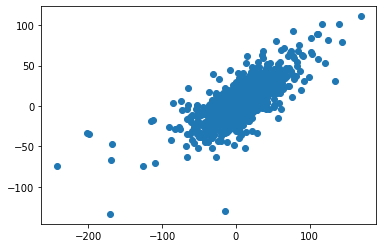

In [87]:
plt.scatter(y_test, y_pred)

In [52]:
from sklearn.neural_network import MLPRegressor

In [56]:
mlp = MLPRegressor(hidden_layer_sizes=[100, 200, 100, 50])

In [57]:
mlp.fit(X_train, y_train)

/home/kskozlov/anaconda3/envs/synergy/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(hidden_layer_sizes=[1000, 2000, 1000, 100])

In [55]:
y_pred = mlp.predict(X_test)
r2_score(y_test, y_pred)

0.45157538603714864